# Interactive PreliZ examples

The examples below can be executed from within this page thanks to embedded integration with Binder via Thebe.
Click on the button below and start playing with PreliZ right from your browser or open this notebook or Binder directly [![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=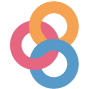)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Fpreliz%26urlpath%3Dtree%252Fpreliz%252Fdocs%252Fexamples%252Finteractive_examples.ipynb%26branch%3Dmain)


:::{thebe-button}
:::

In [ ]:
# latest PreliZ might not be installed
import sys

!{sys.executable} -m pip install preliz@git+https://github.com/arviz-devs/preliz.git

In [1]:
import arviz as az 
import preliz as pz

In [2]:
az.style.use("arviz-white")

(distributions_interactive)=

## Distributions

PreliZ is an open source project aiming to provide tools to help you define priors for your models. 

When setting priors for a Bayesian model, sometimes all we need is to quickly inspect the shape of a distribution, we care about features like were the bulk of the mass is, or how ticks the tails are. And in general we need to explore how this features change when changing the parameters

With PreliZ we can easily plot the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) of a given distribution.

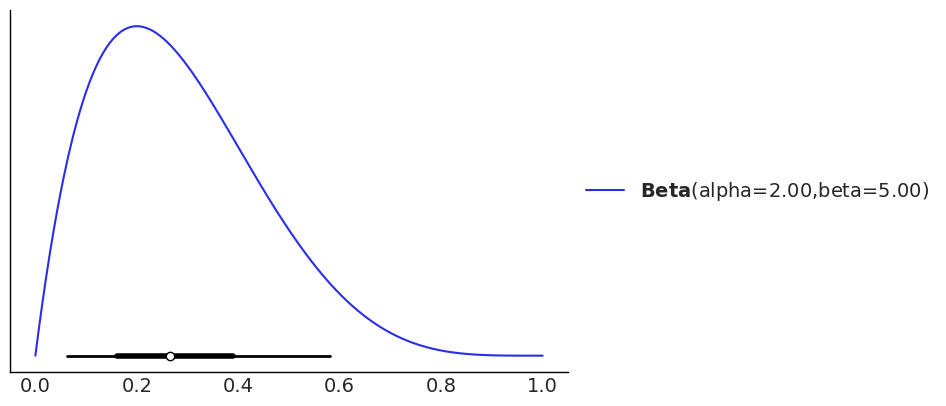

In [3]:
pz.Beta(2,5).plot_pdf(box=True);

We got the PDF in blue, and because we passed the argument `box=True` we also got a box-plot at the bottom, that may help us interpret what a `Beta(2, 5)` actually means. The white dot represents the mean, the thicker line the interquartile range, i.e the interval defined by the quantiles 0.25 and 0.75 (or in other words the central 50% of the distribution) and the thinner line the interval defined by the 0.05 and 0.95 quantiles.

For simplicity we also use `plot_pdf` for discrete distributions

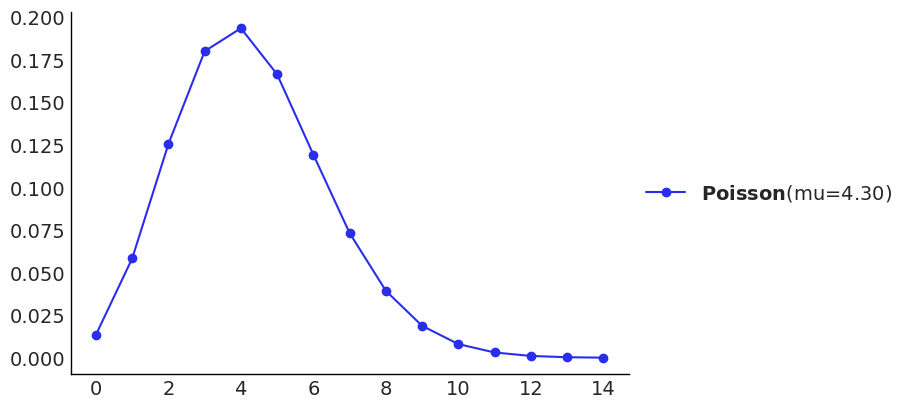

In [4]:
pz.Poisson(4.3).plot_pdf();

We can include more than one distribution in the same plot. This can be useful to compare the impact of parameters on a given distribution or maybe different distributions.

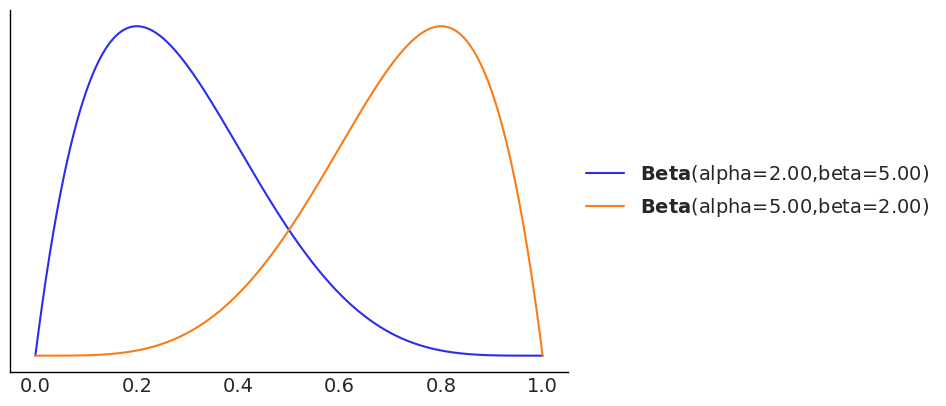

In [5]:
pz.Beta(2,5).plot_pdf()
pz.Beta(5,2).plot_pdf();

We can also easily plot the [cumulative distribution function](https://en.wikipedia.org/wiki/cumulative_distribution_function) (cdf).

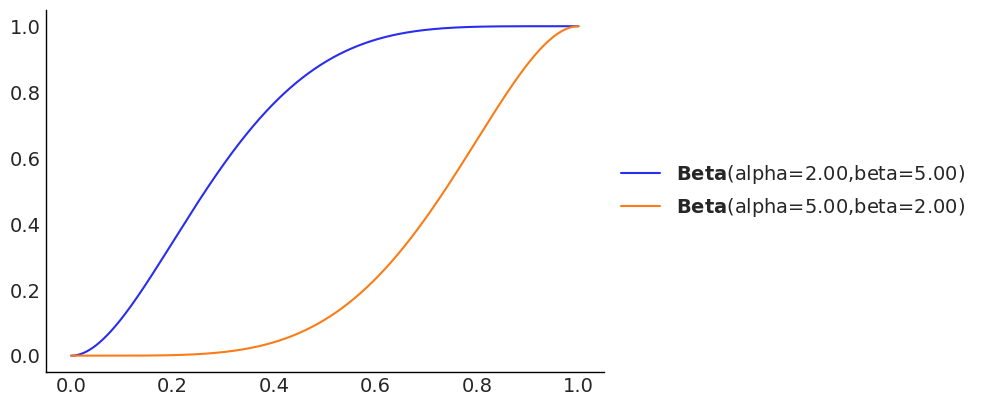

In [6]:
pz.Beta(2,5).plot_cdf();
pz.Beta(5,2).plot_cdf();

or the [quantile function](https://en.wikipedia.org/wiki/Quantile_function), also known as the percentile function or the inverse of the cdf.

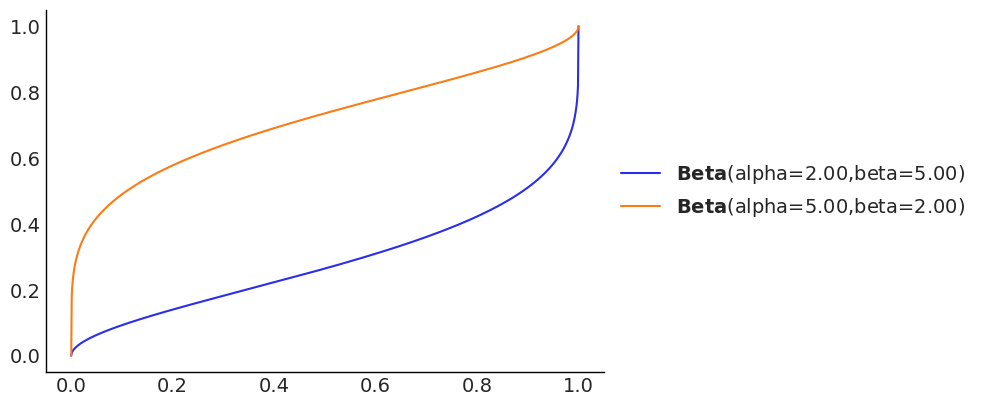

In [7]:
pz.Beta(2,5).plot_ppf();
pz.Beta(5,2).plot_ppf();

PreliZ distributions are wrappers of scipy distributions, so once we define a distribution by passing their parameters we have access to the underlying `rv_frozen` object.

In [8]:
dist = pz.Beta(2, 2)
dist.rv_frozen.rvs(10)

array([0.47892359, 0.69188385, 0.37242907, 0.23334364, 0.72073108,
       0.20640153, 0.64440178, 0.18206783, 0.5496881 , 0.27472172])

(maxent_interactive)=

## From intervals to distributions

At other times, instead of defining a prior by tweaking the parameters of a given distribution, we would like to find a distribution that has certain mass inside some interval. PreliZ can do this with the `pz.maxent` function, that adds one additional constraint, it returns the maximum entropy distribution. Having priors with maximum entropy makes sense as this guarantees that we have the less informative distribution, given a set of constraints. In summary `pz.maxent` will find the distribution with maximum entropy that have a certain mass inside a given interval.

Here we compare a Beta and a Normal, with the constraints of having 0.6 of the probability mass inside the interval 0.3, 0.8.

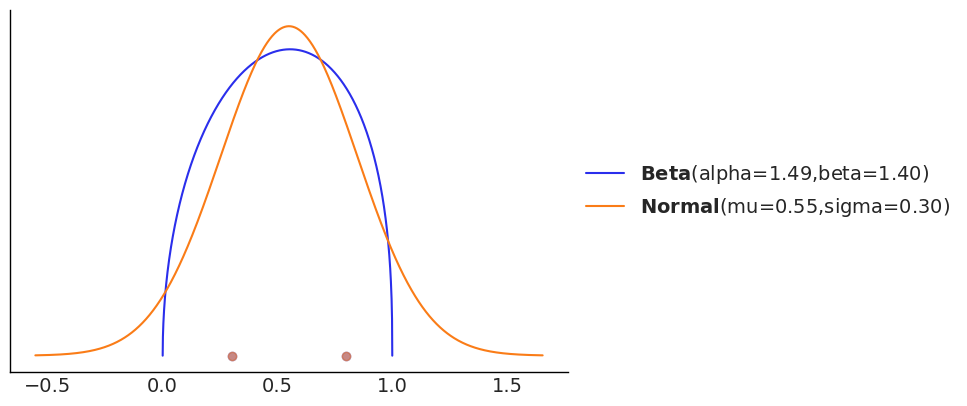

In [9]:
pz.maxent(pz.Beta(), 0.3, 0.8, 0.6)
pz.maxent(pz.Normal(), 0.3, 0.8, 0.6);

(quartile_interactive)=

## From intervals to distributions with quartiles

Yet another alternative is to define a distribution by it [quartiles](https://en.wikipedia.org/wiki/Quartile), that is by the 3 points which divides the distribution into 4 parts each with 25% of the total mass.

The requested mass in the interval (q1=3 - q3=7) is 0.5, but the computed one is 0.48


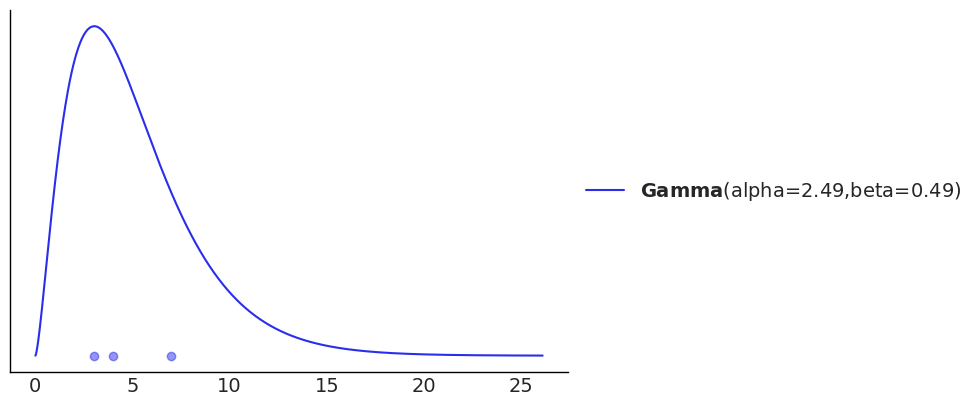

In [10]:
pz.quartile(pz.Gamma(), 3, 4, 7);

Both `pz.quartile` and `pz.maxent` will return a message when the difference between the requested and computed masses is larger than certain threshold.

(roulette_interactive)=

## The roulette method

The roulette method allows to find prior distributions by *drawing*. For this task we are offered with a grid of m equally sized bins covering the range of x. And we have to allocate a total of n chips between the bins. In other words we use a grid to draw a histogram and the function will try to tell us what distribution, from a given pool of options, is a better fit for our drawing.

When called, the `pz.roulette()` function, will pop up a Tkinter window. This pop-up window is not currently working inside Binder. In case you can not see the pop-up window, here you have short gif.

Notice that in order to get the fitted distribution in the bottom panel, you have to move the cursor out of the figure.

In [ ]:
pz.roulette()

![roulette](roulette_example.gif)